In [26]:
from src.model_tester import *
from src.produce_datasets import *
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier as RFC
sns.set_style('darkgrid')

In [33]:
rfc =  RFC(bootstrap=True, ccp_alpha=0,
                        criterion='entropy', max_depth=2, max_features='log2',
                        max_leaf_nodes=None, max_samples=1,
                        min_impurity_decrease=0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=200,
                        n_jobs=None, oob_score=True, verbose=0,
                        warm_start=False)

In [5]:
df = pd.read_json('data/training_dataset.json')

In [6]:
X = df.loc[:,features].values
y_recovery = df.loc[:,['recovery']].values * 1
y_delta = df.loc[:,['delta']].values
y_recovery = y_recovery.reshape(len(y_recovery),)
y_delta = y_delta.reshape(len(y_recovery),)
X_train, X_test, y_train, y_test = train_test_split(X, y_recovery, test_size=.2, stratify = y_recovery)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
rfc.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_depth=2,
                       max_features='log2', max_samples=1,
                       min_impurity_decrease=0, n_estimators=200,
                       oob_score=True, warm_start=True)

In [40]:
def remove_features():
    drop_features = features
    scores = []
    counter = 0
    for generation in [7,6,5,4,3,2,1]:
        drop_features = [x for x in drop_features if x not in industry_generations[generation]]
        X = df.loc[:,drop_features].values
        y_recovery = df.loc[:,['recovery']].values * 1
        y_delta = df.loc[:,['delta']].values
        y_recovery = y_recovery.reshape(len(y_recovery),)
        y_delta = y_delta.reshape(len(y_recovery),)
        X_train, X_test, y_train, y_test = train_test_split(X, y_recovery, test_size=.2, stratify = y_recovery)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        rfc.fit(X_train, y_train)
        scores.append(f1_score(y_test, rfc.predict(X_test)))
        counter += 1
        print(scores, generation)
    return scores

In [41]:
remove_features()

[0.7198529411764707] 7
[0.7198529411764707, 0.7198529411764707] 6
[0.7198529411764707, 0.7198529411764707, 0.7198529411764707] 5
[0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.7198529411764707] 4
[0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.0] 3
[0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.0, 0.7198529411764707] 2
[0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.7198529411764707, 0.0, 0.7198529411764707, 0.7198529411764707] 1


[0.7198529411764707,
 0.7198529411764707,
 0.7198529411764707,
 0.7198529411764707,
 0.0,
 0.7198529411764707,
 0.7198529411764707]

In [22]:
features

['10',
 '101',
 '1011',
 '1012',
 '1013',
 '102',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '11',
 '111',
 '1111',
 '11111',
 '111110',
 '11112',
 '111120',
 '11113',
 '111130',
 '11114',
 '111140',
 '11115',
 '111150',
 '11116',
 '111160',
 '11119',
 '111191',
 '111199',
 '1112',
 '11121',
 '111211',
 '111219',
 '1113',
 '11131',
 '111310',
 '11132',
 '111320',
 '11133',
 '111331',
 '111332',
 '111333',
 '111334',
 '111335',
 '111336',
 '111339',
 '1114',
 '11141',
 '111411',
 '111419',
 '11142',
 '111421',
 '111422',
 '1119',
 '11191',
 '111910',
 '11192',
 '111920',
 '11193',
 '111930',
 '11194',
 '111940',
 '11199',
 '111991',
 '111992',
 '111998',
 '112',
 '1121',
 '11211',
 '112111',
 '112112',
 '11212',
 '112120',
 '1122',
 '11221',
 '112210',
 '1123',
 '11231',
 '112310',
 '11232',
 '112320',
 '11233',
 '112330',
 '11234',
 '112340',
 '11239',
 '112390',
 '1124',
 '11241',
 '112410',
 '11242',
 '112420',
 '1125',
 '11251',
 '112511',
 '11

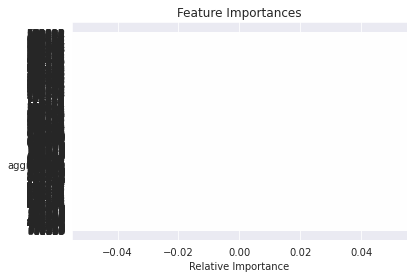

In [16]:
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
industry_generations = {0:['10'],
                        1:['101','102'],
                        2:['1011','1012','1013','1021','1022','1023','1024','1025','1026','1027','1028','1029'],
                        3:['11','21','22','23','42','51','52','53','54','55','56','61','62','71','72','81','92','99','31-33','44-45','48-49'],
                        4:['111','112','113','114','115','211','212','213','221','236','237','238','311','312','313','314','315','316','321','322','323','324','325','326','327','331','332','333','334','335','336','337','339','423','424','425','441','442','443','444','445','446','447','448','451','452','453','454','481','482','483','484','485','486','487','488','491','492','493','511','512','515','516','517','518','519','521','522','523','524','525','531','532','533','541','551','561','562','611','621','622','623','624','711','712','713','721','722','811','812','813','814','921','922','923','924','925','926','927','928','999'],5:['1111','1112','1113','1114','1119','1121','1122','1123','1124','1125','1129','1131','1132','1133','1141','1142','1151','1152','1153','2111','2121','2122','2123','2131','2211','2212','2213','2361','2362','2371','2372','2373','2379','2381','2382','2383','2389','3111','3112','3113','3114','3115','3116','3117','3118','3119','3121','3122','3131','3132','3133','3141','3149','3151','3152','3159','3161','3162','3169','3211','3212','3219','3221','3222','3231','3241','3251','3252','3253','3254','3255','3256','3259','3261','3262','3271','3272','3273','3274','3279','3311','3312','3313','3314','3315','3321','3322','3323','3324','3325','3326','3327','3328','3329','3331','3332','3333','3334','3335','3336','3339','3341','3342','3343','3344','3345','3346','3351','3352','3353','3359','3361','3362','3363','3364','3365','3366','3369','3371','3372','3379','3391','3399','4231','4232','4233','4234','4235','4236','4237','4238','4239','4241','4242','4243','4244','4245','4246','4247','4248','4249','4251','4411','4412','4413','4421','4422','4431','4441','4442','4451','4452','4453','4461','4471','4481','4482','4483','4511','4512','4521','4522','4523','4529','4531','4532','4533','4539','4541','4542','4543','4811','4812','4821','4831','4832','4841','4842','4851','4852','4853','4854','4855','4859','4861','4862','4869','4871','4872','4879','4881','4882','4883','4884','4885','4889','4911','4921','4922','4931','5111','5112','5121','5122','5151','5152','5161','5171','5172','5173','5174','5175','5179','5181','5182','5191','5211','5221','5222','5223','5231','5232','5239','5241','5242','5251','5259','5311','5312','5313','5321','5322','5323','5324','5331','5411','5412','5413','5414','5415','5416','5417','5418','5419','5511','5611','5612','5613','5614','5615','5616','5617','5619','5621','5622','5629','6111','6112','6113','6114','6115','6116','6117','6211','6212','6213','6214','6215','6216','6219','6221','6222','6223','6231','6232','6233','6239','6241','6242','6243','6244','7111','7112','7113','7114','7115','7121','7131','7132','7139','7211','7212','7213','7221','7222','7223','7224','7225','8111','8112','8113','8114','8121','8122','8123','8129','8131','8132','8133','8134','8139','8141','9211','9221','9231','9241','9251','9261','9271','9281','9999'],
                        6:['11111','11112','11113','11114','11115','11116','11119','11121','11131','11132','11133','11141','11142','11191','11192','11193','11194','11199','11211','11212','11221','11231','11232','11233','11234','11239','11241','11242','11251','11291','11292','11293','11299','11311','11321','11331','11411','11421','11511','11521','11531','21111','21112','21113','21211','21221','21222','21223','21229','21231','21232','21239','21311','22111','22112','22121','22131','22132','22133','23611','23621','23622','23711','23712','23713','23721','23731','23799','23811','23812','23813','23814','23815','23816','23817','23819','23821','23822','23829','23831','23832','23833','23834','23835','23839','23891','23899','31111','31121','31122','31123','31131','31132','31133','31134','31135','31141','31142','31151','31152','31161','31171','31181','31182','31183','31191','31192','31193','31194','31199','31211','31212','31213','31214','31221','31222','31223','31311','31321','31322','31323','31324','31331','31332','31411','31412','31491','31499','31511','31519','31521','31522','31523','31524','31528','31529','31599','31611','31621','31699','32111','32121','32191','32192','32199','32211','32212','32213','32221','32222','32223','32229','32311','32312','32411','32412','32419','32511','32512','32513','32518','32519','32521','32522','32531','32532','32541','32551','32552','32561','32562','32591','32592','32599','32611','32612','32613','32614','32615','32616','32619','32621','32622','32629','32711','32712','32721','32731','32732','32733','32739','32741','32742','32791','32799','33111','33121','33122','33131','33141','33142','33149','33151','33152','33211','33221','33231','33232','33241','33242','33243','33251','33261','33271','33272','33281','33291','33299','33311','33312','33313','33321','33322','33324','33329','33331','33341','33351','33361','33391','33392','33399','33411','33421','33422','33429','33431','33441','33451','33461','33511','33512','33521','33522','33531','33591','33592','33593','33599','33611','33612','33621','33631','33632','33633','33634','33635','33636','33637','33639','33641','33651','33661','33699','33711','33712','33721','33791','33792','33911','33991','33992','33993','33994','33995','33999','42311','42312','42313','42314','42321','42322','42331','42332','42333','42339','42341','42342','42343','42344','42345','42346','42349','42351','42352','42361','42362','42369','42371','42372','42373','42374','42381','42382','42383','42384','42385','42386','42391','42392','42393','42394','42399','42411','42412','42413','42421','42431','42432','42433','42434','42441','42442','42443','42444','42445','42446','42447','42448','42449','42451','42452','42459','42461','42469','42471','42472','42481','42482','42491','42492','42493','42494','42495','42499','42511','42512','44111','44112','44121','44122','44131','44132','44211','44221','44229','44311','44312','44313','44314','44411','44412','44413','44419','44421','44422','44511','44512','44521','44522','44523','44529','44531','44611','44612','44613','44619','44711','44719','44811','44812','44813','44814','44815','44819','44821','44831','44832','45111','45112','45113','45114','45121','45122','45211','45221','45231','45291','45299','45311','45321','45322','45331','45391','45392','45393','45399','45411','45421','45431','45439','48111','48121','48211','48311','48321','48411','48412','48421','48422','48423','48511','48521','48531','48532','48541','48551','48599','48611','48621','48691','48699','48711','48721','48799','48811','48819','48821','48831','48832','48833','48839','48841','48849','48851','48899','49111','49211','49221','49311','49312','49313','49319','51111','51112','51113','51114','51119','51121','51211','51212','51213','51219','51221','51222','51223','51224','51225','51229','51511','51512','51521','51611','51711','51721','51731','51741','51751','51791','51811','51821','51911','51912','51913','51919','52111','52211','52212','52213','52219','52221','52222','52229','52231','52232','52239','52311','52312','52313','52314','52321','52391','52392','52393','52399','52411','52412','52413','52421','52429','52511','52512','52519','52591','52592','52593','52599','53111','53112','53113','53119','53121','53131','53132','53139','53211','53212','53221','53222','53223','53228','53229','53231','53241','53242','53249','53311','54111','54119','54121','54131','54132','54133','54134','54135','54136','54137','54138','54141','54142','54143','54149','54151','54161','54162','54169','54171','54172','54181','54182','54183','54184','54185','54186','54187','54189','54191','54192','54193','54194','54199','55111','56111','56121','56131','56132','56133','56141','56142','56143','56144','56145','56149','56151','56152','56159','56161','56162','56171','56172','56173','56174','56179','56191','56192','56199','56211','56221','56291','56292','56299','61111','61121','61131','61141','61142','61143','61151','61161','61162','61163','61169','61171','62111','62121','62131','62132','62133','62134','62139','62141','62142','62149','62151','62161','62191','62199','62211','62221','62231','62311','62321','62322','62331','62399','62411','62412','62419','62421','62422','62423','62431','62441','71111','71112','71113','71119','71121','71131','71132','71141','71151','71211','71212','71213','71219','71311','71312','71321','71329','71391','71392','71393','71394','71395','71399','72111','72112','72119','72121','72131','72211','72221','72231','72232','72233','72241','72251','81111','81112','81119','81121','81131','81141','81142','81143','81149','81211','81219','81221','81222','81231','81232','81233','81291','81292','81293','81299','81311','81321','81331','81341','81391','81392','81393','81394','81399','81411','92111','92112','92113','92114','92115','92119','92211','92212','92213','92214','92215','92216','92219','92311','92312','92313','92314','92411','92412','92511','92512','92611','92612','92613','92614','92615','92711','92811','92812','99999'],
                        7:['111110','111120','111130','111140','111150','111160','111191','111199','111211','111219','111310','111320','111331','111332','111333','111334','111335','111336','111339','111411','111419','111421','111422','111910','111920','111930','111940','111991','111992','111998','112111','112112','112120','112210','112310','112320','112330','112340','112390','112410','112420','112511','112512','112519','112910','112920','112930','112990','113110','113210','113310','114111','114112','114119','114210','115111','115112','115113','115114','115115','115116','115210','115310','211111','211112','211120','211130','212111','212112','212113','212210','212221','212222','212230','212231','212234','212291','212299','212311','212312','212313','212319','212321','212322','212324','212325','212391','212392','212393','212399','213111','213112','213113','213114','213115','221111','221112','221113','221114','221115','221116','221117','221118','221119','221121','221122','221210','221310','221320','221330','236115','236116','236117','236118','236210','236220','237110','237120','237130','237210','237310','237990','238111','238112','238121','238122','238131','238132','238141','238142','238151','238152','238161','238162','238171','238172','238191','238192','238211','238212','238221','238222','238291','238292','238311','238312','238321','238322','238331','238332','238341','238342','238351','238352','238391','238392','238911','238912','238991','238992','311111','311119','311211','311212','311213','311221','311222','311223','311224','311225','311230','311311','311312','311313','311314','311320','311330','311340','311351','311352','311411','311412','311421','311422','311423','311511','311512','311513','311514','311520','311611','311612','311613','311615','311710','311711','311712','311811','311812','311813','311821','311822','311823','311824','311830','311911','311919','311920','311930','311941','311942','311991','311999','312111','312112','312113','312120','312130','312140','312210','312221','312229','312230','313110','313111','313112','313113','313210','313220','313221','313222','313230','313240','313241','313249','313310','313311','313312','313320','314110','314120','314121','314129','314910','314911','314912','314991','314992','314994','314999','315110','315111','315119','315190','315191','315192','315210','315211','315212','315220','315221','315222','315223','315224','315225','315228','315231','315232','315233','315234','315239','315240','315280','315291','315292','315299','315990','315991','315992','315993','315999','316110','316210','316211','316212','316213','316214','316219','316991','316992','316993','316998','316999','321113','321114','321211','321212','321213','321214','321219','321911','321912','321918','321920','321991','321992','321999','322110','322121','322122','322130','322211','322212','322213','322214','322215','322219','322220','322221','322222','322223','322224','322225','322226','322230','322231','322232','322233','322291','322299','323110','323111','323112','323113','323114','323115','323116','323117','323118','323119','323120','323121','323122','324110','324121','324122','324191','324199','325110','325120','325130','325131','325132','325180','325181','325182','325188','325191','325192','325193','325194','325199','325211','325212','325220','325221','325222','325311','325312','325314','325320','325411','325412','325413','325414','325510','325520','325611','325612','325613','325620','325910','325920','325991','325992','325998','326111','326112','326113','326121','326122','326130','326140','326150','326160','326191','326192','326199','326211','326212','326220','326291','326299','327110','327111','327112','327113','327120','327121','327122','327123','327124','327125','327211','327212','327213','327215','327310','327320','327331','327332','327390','327410','327420','327910','327991','327992','327993','327999','331110','331111','331112','331210','331221','331222','331311','331312','331313','331314','331315','331316','331318','331319','331410','331411','331419','331420','331421','331422','331423','331491','331492','331511','331512','331513','331521','331522','331523','331524','331525','331528','331529','332111','332112','332114','332115','332116','332117','332119','332211','332212','332213','332214','332215','332216','332311','332312','332313','332321','332322','332323','332410','332420','332431','332439','332510','332611','332612','332613','332618','332710','332721','332722','332811','332812','332813','332911','332912','332913','332919','332991','332992','332993','332994','332995','332996','332997','332998','332999','333111','333112','333120','333131','333132','333210','333220','333241','333242','333243','333244','333249','333291','333292','333293','333294','333295','333298','333311','333312','333313','333314','333315','333316','333318','333319','333411','333412','333413','333414','333415','333511','333512','333513','333514','333515','333516','333517','333518','333519','333611','333612','333613','333618','333911','333912','333913','333914','333921','333922','333923','333924','333991','333992','333993','333994','333995','333996','333997','333999','334111','334112','334113','334118','334119','334210','334220','334290','334310','334411','334412','334413','334414','334415','334416','334417','334418','334419','334510','334511','334512','334513','334514','334515','334516','334517','334518','334519','334611','334612','334613','334614','335110','335121','335122','335129','335210','335211','335212','335220','335221','335222','335224','335228','335311','335312','335313','335314','335911','335912','335921','335929','335931','335932','335991','335999','336111','336112','336120','336211','336212','336213','336214','336310','336311','336312','336320','336321','336322','336330','336340','336350','336360','336370','336390','336391','336399','336411','336412','336413','336414','336415','336419','336510','336611','336612','336991','336992','336999','337110','337121','337122','337124','337125','337127','337129','337211','337212','337214','337215','337910','337920','339111','339112','339113','339114','339115','339116','339910','339911','339912','339913','339914','339920','339930','339931','339932','339940','339941','339942','339943','339944','339950','339991','339992','339993','339994','339995','339999','423110','423120','423130','423140','423210','423220','423310','423320','423330','423390','423410','423420','423430','423440','423450','423460','423490','423510','423520','423610','423620','423690','423710','423720','423730','423740','423810','423820','423830','423840','423850','423860','423910','423920','423930','423940','423990','424110','424120','424130','424210','424310','424320','424330','424340','424410','424420','424430','424440','424450','424460','424470','424480','424490','424510','424520','424590','424610','424690','424710','424720','424810','424820','424910','424920','424930','424940','424950','424990','425110','425120','441110','441120','441210','441221','441222','441228','441229','441310','441320','442110','442210','442291','442299','443111','443112','443120','443130','443141','443142','444110','444120','444130','444190','444210','444220','445110','445120','445210','445220','445230','445291','445292','445299','445310','446110','446120','446130','446191','446199','447110','447190','448110','448120','448130','448140','448150','448190','448210','448310','448320','451110','451120','451130','451140','451211','451212','451220','452111','452112','452210','452311','452319','452910','452990','453110','453210','453220','453310','453910','453920','453930','453991','453998','454110','454111','454112','454113','454210','454310','454311','454312','454319','454390','481111','481112','481211','481212','481219','482111','482112','483111','483112','483113','483114','483211','483212','484110','484121','484122','484210','484220','484230','485111','485112','485113','485119','485210','485310','485320','485410','485510','485991','485999','486110','486210','486910','486990','487110','487210','487990','488111','488119','488190','488210','488310','488320','488330','488390','488410','488490','488510','488991','488999','491110','492110','492210','493110','493120','493130','493190','511110','511120','511130','511140','511191','511199','511210','512110','512120','512131','512132','512191','512199','512210','512220','512230','512240','512250','512290','515111','515112','515120','515210','516110','517110','517210','517211','517212','517310','517311','517312','517410','517510','517910','517911','517919','518111','518112','518210','519110','519120','519130','519190','521110','522110','522120','522130','522190','522210','522220','522291','522292','522293','522294','522298','522310','522320','522390','523110','523120','523130','523140','523210','523910','523920','523930','523991','523999','524113','524114','524126','524127','524128','524130','524210','524291','524292','524298','525110','525120','525190','525910','525920','525930','525990','531110','531120','531130','531190','531210','531311','531312','531320','531390','532111','532112','532120','532210','532220','532230','532281','532282','532283','532284','532289','532291','532292','532299','532310','532411','532412','532420','532490','533110','541110','541191','541199','541211','541213','541214','541219','541310','541320','541330','541340','541350','541360','541370','541380','541410','541420','541430','541490','541511','541512','541513','541519','541611','541612','541613','541614','541618','541620','541690','541710','541711','541712','541713','541714','541715','541720','541810','541820','541830','541840','541850','541860','541870','541890','541910','541921','541922','541930','541940','541990','551111','551112','551114','561110','561210','561310','561311','561312','561320','561330','561410','561421','561422','561431','561439','561440','561450','561491','561492','561499','561510','561520','561591','561599','561611','561612','561613','561621','561622','561710','561720','561730','561740','561790','561910','561920','561990','562111','562112','562119','562211','562212','562213','562219','562910','562920','562991','562998','611110','611210','611310','611410','611420','611430','611511','611512','611513','611519','611610','611620','611630','611691','611692','611699','611710','621111','621112','621210','621310','621320','621330','621340','621391','621399','621410','621420','621491','621492','621493','621498','621511','621512','621610','621910','621991','621999','622110','622210','622310','623110','623210','623220','623311','623312','623990','624110','624120','624190','624210','624221','624229','624230','624310','624410','711110','711120','711130','711190','711211','711212','711219','711310','711320','711410','711510','712110','712120','712130','712190','713110','713120','713210','713290','713910','713920','713930','713940','713950','713990','721110','721120','721191','721199','721211','721214','721310','722110','722211','722212','722213','722310','722320','722330','722410','722511','722513','722514','722515','811111','811112','811113','811118','811121','811122','811191','811192','811198','811211','811212','811213','811219','811310','811411','811412','811420','811430','811490','812111','812112','812113','812191','812199','812210','812220','812310','812320','812331','812332','812910','812921','812922','812930','812990','813110','813211','813212','813219','813311','813312','813319','813410','813910','813920','813930','813940','813990','814110','921110','921120','921130','921140','921150','921190','922110','922120','922130','922140','922150','922160','922190','923110','923120','923130','923140','924110','924120','925110','925120','926110','926120','926130','926140','926150','927110','928110','928120','999999',]}
